# Wearables AI — End-to-End Demo

Click **Runtime → Run all**. The notebook will use `data/WISDM_preprocessed.csv` if present, or generate synthetic data so it runs end-to-end.


In [1]:
# Install deps (Colab/non-venv friendly). This is a no-op locally if already installed.
!pip -q install pandas numpy scikit-learn matplotlib shap

              precision    recall  f1-score   support

           0       0.33      0.25      0.29        55
           1       0.20      0.06      0.09        33
           2       0.46      0.69      0.56        72

    accuracy                           0.41       160
   macro avg       0.33      0.34      0.31       160
weighted avg       0.36      0.41      0.37       160



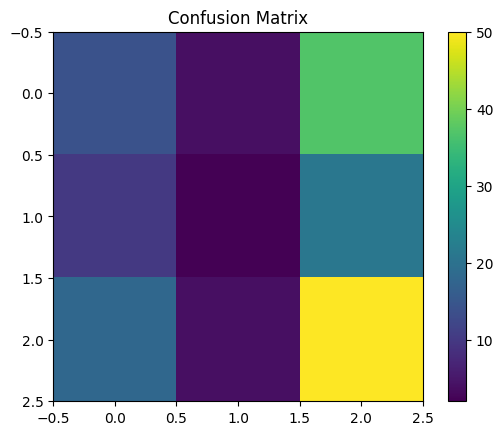

In [2]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset if available; otherwise make synthetic so the demo always runs.
path = 'data/WISDM_preprocessed.csv'
if os.path.exists(path):
    df = pd.read_csv(path)
else:
    rng = np.random.default_rng(0)
    X = pd.DataFrame({
        'x_mean': rng.normal(size=800),
        'y_mean': rng.normal(size=800),
        'z_mean': rng.normal(size=800),
        'x_std':  rng.normal(size=800),
        'y_std':  rng.normal(size=800),
        'z_std':  rng.normal(size=800),
    })
    y = pd.Series(rng.choice(['Walking','Jogging','Standing'], size=800, p=[0.45,0.35,0.20]), name='activity')
    df = pd.concat([X, y], axis=1)

X = df.drop(columns=['activity'])
y = LabelEncoder().fit_transform(df['activity'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
clf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.imshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

 90%|==================  | 434/480 [00:12<00:01]       

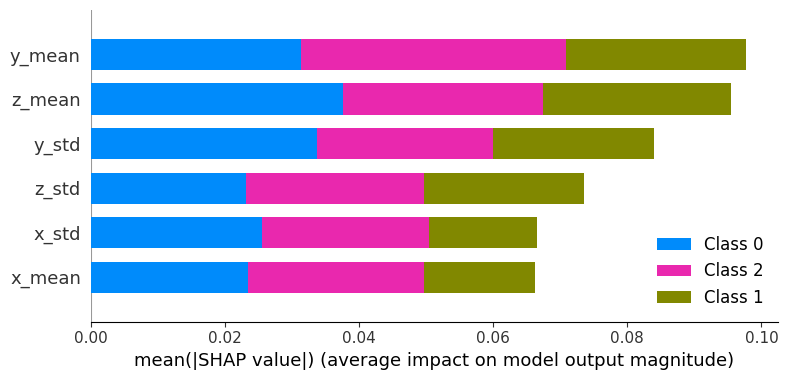

In [3]:
import shap, matplotlib.pyplot as plt
explainer = shap.Explainer(clf, X_train)
sv = explainer(X_test)
shap.summary_plot(sv, X_test)